In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# File to Load 
ev_data = "Electric_Vehicle_Population_Data.csv"

## Electric Cars ( Battery and Plug In)

In [3]:
# Read Student Data File and store into Pandas DataFrames
electric_df = pd.read_csv(ev_data)
electric_df.head()

,make,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
0,Toyota,Prius Prime,2018,OLYMPIA,WA,98502,168473210,25,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.97996899999998 47.078241),27300
1,Toyota,Prius Prime,2018,KENT,WA,98031,9585145,25,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.196448 47.40561),27300
2,Ford,Fusion Energi,2017,FEDERAL WAY,WA,98023,8877823,21,Plug-in Hybrid Electric Vehicle (PHEV),POINT (-122.362029 47.308531),33120
3,Bmw,I3,2018,SEATTLE,WA,98136,474613408,114,Battery Electric Vehicle (BEV),POINT (-122.38895500000001 47.537382),44450
4,Ford,Focus,2013,KENT,WA,98032,252574269,76,Battery Electric Vehicle (BEV),POINT (-122.26132099999998 47.390601),39200


In [4]:
ev_car_df = electric_df.groupby(["make"]).count()
ev_car_df.head()

,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
make,,,,,,,,,,
Audi,936,936,936,936,936,936,936,936,936,936
Azure Dynamics,9,9,9,9,9,9,9,9,9,9
Bmw,2569,2569,2569,2569,2569,2569,2569,2569,2568,2569
Cadillac,96,96,96,96,96,96,96,96,96,96
Chevrolet,7908,7908,7908,7908,7908,7908,7908,7908,7908,7908


In [5]:
ev_make_count = electric_df["make"].value_counts()
ev_make_count 

Tesla                   23368
Nissan                  10947
Chevrolet                7908
Ford                     3610
Toyota                   2748
Bmw                      2569
Kia                      2172
Audi                      936
Volkswagen                928
Hyundai                   837
Chrysler                  743
Fiat                      720
Honda                     631
Volvo                     536
Mitsubishi                384
Porsche                   299
Smart                     241
Mercedes-Benz             230
Jaguar                    157
Mini                      149
Cadillac                   96
Subaru                     41
Land Rover                 25
Fisker                     17
Lincoln                    11
Azure Dynamics              9
Th!Nk                       4
Wheego Electric Cars        2
Dodge                       1
Name: make, dtype: int64

In [6]:
top_10_ev_car =ev_car_df.nlargest(10, 'model')
top_10_ev_car


,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
make,,,,,,,,,,
Tesla,23368,23368,23368,23368,23368,23368,23368,23368,23367,23368
Nissan,10947,10947,10947,10947,10947,10947,10947,10947,10947,10947
Chevrolet,7908,7908,7908,7908,7908,7908,7908,7908,7908,7908
Ford,3610,3610,3610,3610,3610,3610,3610,3610,3610,3610
Toyota,2748,2748,2748,2748,2748,2748,2748,2748,2748,2748
Bmw,2569,2569,2569,2569,2569,2569,2569,2569,2568,2569
Kia,2172,2172,2172,2172,2172,2172,2172,2172,2172,2172
Audi,936,936,936,936,936,936,936,936,936,936
Volkswagen,928,928,928,928,928,928,928,928,928,928


In [7]:
top_10_ev_car_final = top_10_ev_car.groupby("make")["model"].sum()
top_10_ev_car_final 

make
Audi            936
Bmw            2569
Chevrolet      7908
Ford           3610
Hyundai         837
Kia            2172
Nissan        10947
Tesla         23368
Toyota         2748
Volkswagen      928
Name: model, dtype: int64

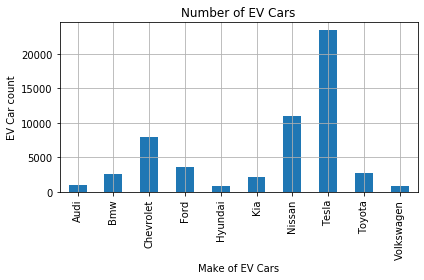

In [8]:
ev_car_chart = top_10_ev_car_final.plot(kind='bar')

# Set the xlabel and ylabel using class methods
ev_car_chart.set_xlabel("Make of EV Cars")
ev_car_chart.set_ylabel("EV Car count")
ev_car_chart.set_title("Number of EV Cars")
plt.tight_layout()
plt.grid()
plt.show()


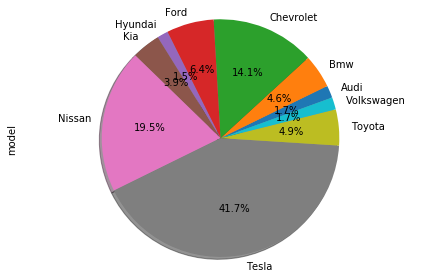

In [9]:
# Generate a pie plot showing the distribution of Ev Cars
top_10_ev_car_final.plot(kind ="pie",shadow=True, autopct = "%1.1f%%",startangle =20)
explode = (0.1,0)
plt.axis("equal")
plt.tight_layout()
plt.show()

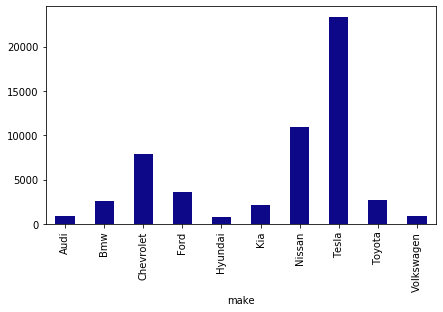

In [10]:
top_10_ev_car_final.plot(kind="bar",figsize=(7,4),colormap = "plasma")

## Battery Electric Vehicles

In [25]:
bev_df = electric_df[electric_df["Electric_Vehicle_Type"] == "Battery Electric Vehicle (BEV)"]
bev_df 

,make,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
3,Bmw,I3,2018,SEATTLE,WA,98136,474613408,114,Battery Electric Vehicle (BEV),POINT (-122.38895500000001 47.537382),44450
4,Ford,Focus,2013,KENT,WA,98032,252574269,76,Battery Electric Vehicle (BEV),POINT (-122.26132099999998 47.390601),39200
7,Kia,Niro,2020,VASHON,WA,98070,103345581,239,Battery Electric Vehicle (BEV),POINT (-122.469161 47.415443),0
8,Mercedes-Benz,B250E,2017,BELLEVUE,WA,98006,114828808,87,Battery Electric Vehicle (BEV),POINT (-122.151342 47.560192),40895
11,Tesla,Model 3,2019,WOODINVILLE,WA,98077,477708927,220,Battery Electric Vehicle (BEV),POINT (-122.05752200000002 47.749161),35000
...,...,...,...,...,...,...,...,...,...,...,...
60310,Tesla,Model 3,2018,SEATTLE,WA,98144,277151129,215,Battery Electric Vehicle (BEV),POINT (-122.30033 47.585339),36000
60311,Tesla,Model 3,2018,FRIDAY HARBOR,WA,98250,476247096,215,Battery Electric Vehicle (BEV),POINT (-123.084302 48.544106),36000
60314,Tesla,Model 3,2018,REDMOND,WA,98052,348309538,215,Battery Electric Vehicle (BEV),POINT (-122.122018 47.678465),36000
60315,Nissan,Leaf,2017,SEATTLE,WA,98115,327706032,107,Battery Electric Vehicle (BEV),POINT (-122.297534 47.685291),30680


In [26]:
ev_battery_df = bev_df.groupby(["make"]).count()
ev_battery_df.head()

,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
make,,,,,,,,,,
Audi,335,335,335,335,335,335,335,335,335,335
Azure Dynamics,9,9,9,9,9,9,9,9,9,9
Bmw,482,482,482,482,482,482,482,482,482,482
Chevrolet,3226,3226,3226,3226,3226,3226,3226,3226,3226,3226
Dodge,1,1,1,1,1,1,1,1,1,1


In [27]:
ev_bat_count = bev_df ["make"].value_counts()
ev_bat_count 

Tesla                   23368
Nissan                  10947
Chevrolet                3226
Kia                      1361
Volkswagen                928
Fiat                      720
Bmw                       482
Audi                      335
Ford                      288
Smart                     241
Jaguar                    157
Hyundai                   140
Mercedes-Benz              97
Mitsubishi                 73
Toyota                     60
Mini                       16
Azure Dynamics              9
Th!Nk                       4
Wheego Electric Cars        2
Dodge                       1
Honda                       1
Name: make, dtype: int64

In [28]:
top_10_battery_car =ev_battery_df.nlargest(10, 'model')
top_10_battery_car


,model,model_year,city,states,zip,dol_vehicle_id,Electric_Range,Electric_Vehicle_Type,Vehicle_Location,Base_MSRP
make,,,,,,,,,,
Tesla,23368,23368,23368,23368,23368,23368,23368,23368,23367,23368
Nissan,10947,10947,10947,10947,10947,10947,10947,10947,10947,10947
Chevrolet,3226,3226,3226,3226,3226,3226,3226,3226,3226,3226
Kia,1361,1361,1361,1361,1361,1361,1361,1361,1361,1361
Volkswagen,928,928,928,928,928,928,928,928,928,928
Fiat,720,720,720,720,720,720,720,720,720,720
Bmw,482,482,482,482,482,482,482,482,482,482
Audi,335,335,335,335,335,335,335,335,335,335
Ford,288,288,288,288,288,288,288,288,288,288


In [29]:
top_10_battery_car_final = top_10_battery_car.groupby("make")["model"].sum()
top_10_battery_car_final 

make
Audi            335
Bmw             482
Chevrolet      3226
Fiat            720
Ford            288
Kia            1361
Nissan        10947
Smart           241
Tesla         23368
Volkswagen      928
Name: model, dtype: int64

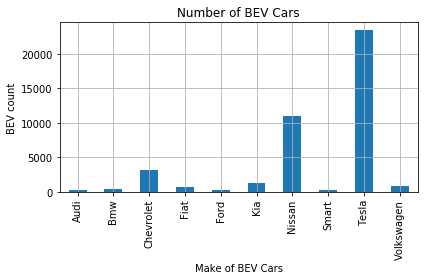

In [30]:
ev_battery_chart = top_10_battery_car_final.plot(kind='bar')

# Set the xlabel and ylabel using class methods
ev_battery_chart.set_xlabel("Make of BEV Cars")
ev_battery_chart.set_ylabel("BEV count")
ev_battery_chart.set_title("Number of BEV Cars")
plt.tight_layout()
plt.grid()
plt.show()

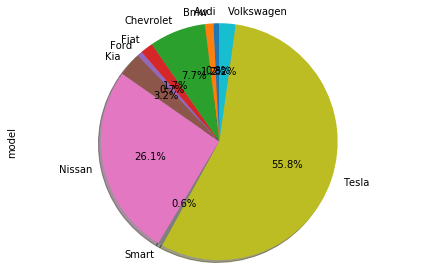

In [31]:
# Generate a pie plot showing the distribution of Ev Cars
top_10_battery_car_final.plot(kind ="pie",shadow=True, autopct = "%1.1f%%",startangle =90)
explode = (0.1,0)
plt.axis("equal")
plt.tight_layout()
plt.show()

In [62]:
bev_avg_range_df =  bev_df.groupby(["make"])["Electric_Range"].mean()
bev_avg_range_df                              

make
Audi                    204.000000
Azure Dynamics           56.000000
Bmw                      92.029046
Chevrolet               228.918785
Dodge                    80.000000
Fiat                     85.983333
Ford                     78.236111
Honda                    89.000000
Hyundai                 244.957143
Jaguar                  234.000000
Kia                     157.846436
Mercedes-Benz            87.000000
Mini                    110.000000
Mitsubishi               61.958904
Nissan                   98.764593
Smart                    62.892116
Tesla                   236.003381
Th!Nk                   100.000000
Toyota                  102.600000
Volkswagen              106.217672
Wheego Electric Cars    100.000000
Name: Electric_Range, dtype: float64

In [91]:
bev_avg_msrp_df = round(bev_df.groupby(["make"])["Base_MSRP"].mean())
bev_avg_msrp_df                         

make
Audi                    74800.0
Azure Dynamics          57400.0
Bmw                     41872.0
Chevrolet               31992.0
Dodge                       0.0
Fiat                    31881.0
Ford                    31948.0
Honda                   37510.0
Hyundai                  8723.0
Jaguar                  54892.0
Kia                     34467.0
Mercedes-Benz           41364.0
Mini                        0.0
Mitsubishi              26774.0
Nissan                  29798.0
Smart                   24795.0
Tesla                   40791.0
Th!Nk                       0.0
Toyota                  47310.0
Volkswagen              15257.0
Wheego Electric Cars    32995.0
Name: Base_MSRP, dtype: float64

### Scatter plot for BEV cars

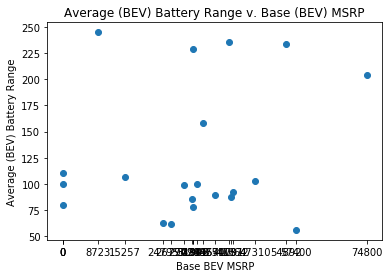

In [108]:
# Scatter plot of Average Battery Range and Base MSRP for BEV cars
plt.scatter(bev_avg_msrp_df,bev_avg_range_df)
plt.xticks(bev_avg_msrp_df)
plt.xlabel("Base BEV MSRP")
plt.ylabel("Average (BEV) Battery Range")
plt.title("Average (BEV) Battery Range v. Base (BEV) MSRP")
plt.show()

### Correlation and Regression  plot for BEV cars

In [101]:
bev_merge_df = pd.merge(bev_avg_msrp_df,bev_avg_range_df, how = "left", on=["make"])
bev_merge_df

,Base_MSRP,Electric_Range
make,,
Audi,74800.0,204.000000
Azure Dynamics,57400.0,56.000000
Bmw,41872.0,92.029046
Chevrolet,31992.0,228.918785
Dodge,0.0,80.000000
Fiat,31881.0,85.983333
Ford,31948.0,78.236111
Honda,37510.0,89.000000
Hyundai,8723.0,244.957143


In [102]:
# Calculate the correlation coefficient and linear regression model 
base_msrp = bev_merge_df.iloc[:,0]
battery_range = bev_merge_df.iloc[:,1]
print(f" The correlation coefficient of weight and the average Battery Range is {round(st.pearsonr(base_msrp ,battery_range)[0],2)}.")

 The correlation coefficient of weight and the average Battery Range is 0.2.


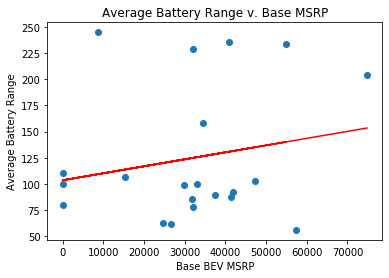

In [107]:
x_value = bev_merge_df["Base_MSRP"]
y_value = bev_merge_df["Electric_Range"]


#linear regression 
(m_slope, m_intercept, m_rvalue, m_pvalue, m_stderr) = linregress(x_value, y_value)

regression_values = x_value * m_slope + m_intercept
plt.scatter(x_value,y_value)
plt.plot(x_value,regression_values, "r-")
plt.xlabel("Base BEV MSRP")
plt.ylabel("Average Battery Range")
plt.title("Average Battery Range v. Base MSRP")
plt.show()